In [1]:
import os
import pdb
import argparse
import numpy as np
import tensorflow as tf
from scipy.stats import pearsonr
from tensorflow.keras import backend as K
from model.model_fn import build_compile_model_pred

/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/gs/home/uranc/anaconda3/envs/tfGPU/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/gs/home/uranc/anaconda3/en

In [2]:
from skimage.io import imshow
import matplotlib.pyplot as plt

In [3]:
#input_name = 'examples/samples_im.png'
input_name = 'examples/samples_nat_im.npy'
WEIGHT_DIR = 'weights.last.h5'
BATCH_SIZE = 64


In [4]:
# input
out_name, file_ext = os.path.splitext(input_name)

#
flag_numpy = 1 if file_ext=='.npy' else 0

# model
model = build_compile_model_pred(WEIGHT_DIR)
model.summary()    

if flag_numpy:
    from skimage.transform import resize
    tmp_input = np.load(input_name)
    test_steps = 1

    NO_INPUT = tmp_input.shape[0]
    # resize
    test_input = np.zeros((NO_INPUT, 84, 84, 3))
    for im_id in range(tmp_input.shape[0]):
        test_input[im_id, :, :, :] = resize(tmp_input[im_id, :, :, :], (84, 84, 3), anti_aliasing=True)
        test_input[im_id, :, :, :] -= [103.939, 116.779, 123.68]
    pred = model.predict(test_input, steps=test_steps)
    np.save(out_name + '_pred.npy', pred)    
    
else:
    from skimage.io import imread
    from skimage.transform import resize
    img = imread(input_name)

    # resize image to 84x84
    img = resize(img, (84, 84, 3), anti_aliasing=True)
    img -= [103.939, 116.779, 123.68]
    pred = model.predict(np.expand_dims(img, axis=0), steps=1)
    print(pred[0][0])
    
    NO_INPUT = 1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
loading model
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 84, 84, 3)]       0         
_________________________________________________________________
model (Model)                (None, 21, 21, 256)       1735488   
_________________________________________________________________
squeeze_1 (Conv2D)           (None, 10, 10, 32)        73760     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
squeeze_2 (Conv2D)           (None, 4, 4, 16)          4624

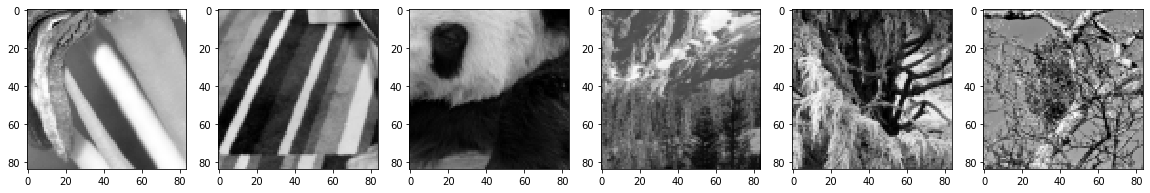

In [5]:
plt.figure(figsize=(20,10))
for ii in range(NO_INPUT):
    plt.subplot(1,6,ii+1)
    plt.imshow(test_input[ii,:,:,:] + [103.939, 116.779, 123.68])
    

In [7]:
pred

array([[0.22771412],
       [0.21979913],
       [0.22885998],
       [0.22246471],
       [0.21555173],
       [0.22140911]], dtype=float32)